In [1]:
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.signal import find_peaks
from uncertainties.umath import sin
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from scipy.optimize import curve_fit
from IPython.display import display, Math

def sci_notation(val, err, unit=""):
    exponent = int(np.floor(np.log10(abs(val)))) if val != 0 else 0
    base_val = val / (10**exponent)
    base_err = err / (10**exponent)
    return rf"({base_val:.3f} \pm {base_err:.3f}) \cdot 10^{{{exponent}}}\,\mathrm{{{unit}}}"

def latex(latex_str):
    display({'text/latex': latex_str}, raw=True)

e = 1.602*1e-19
h = 6.626*1e-34

Eigenschaften verschiedener Dioden

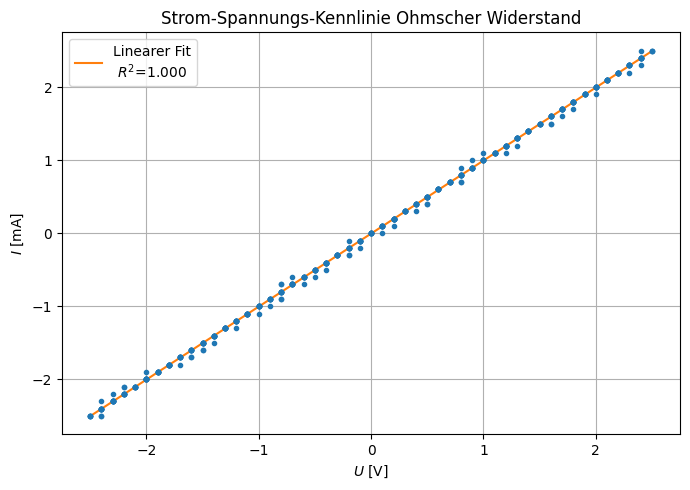

<IPython.core.display.Math object>

In [2]:
#Ohmscher widerstand Kennlinie

Kennlinie_widerstand = pd.read_csv("Widerstand_Kennlinien.csv", sep=',', decimal='.')

I = Kennlinie_widerstand['I'].values  # []
U = Kennlinie_widerstand['U'].values  # []

k,y,r,_,std = linregress(U,I)

plt.figure(figsize=(7, 5))
plt.plot(U,I, 'o', markersize=3,zorder=10)
plt.plot(U, k*U+y,'-', label=f"Linearer Fit\n $R^2$={r:.3f}")
plt.xlabel("$U$ [V]")
plt.ylabel("$I$ [mA]")
plt.title("Strom-Spannungs-Kennlinie Ohmscher Widerstand")
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Kennlinie_widerstand.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Kennlinie_widerstand.pdf")
plt.show()

display(Math(rf"R = {k*1e3:.2f}\pm {std:.3f}~\mathrm{{\Omega}}"))


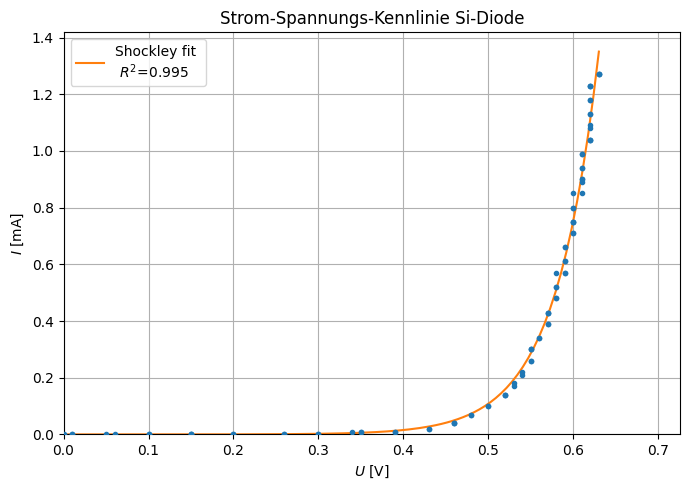

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
#Si-Dioden Kennlinien

k_B = 1.381e-23  # J/K
T = 300  # K
V_T = k_B * T / e 

# Shockley-Funktion
def shockley(U, I_s, n):
    return I_s * (np.exp(U / (n * V_T)) - 1)

# Daten laden
Kennlinie_Si_Diode = pd.read_csv("Kennlinie_Si_Diode.csv", sep=',', decimal='.')
U_wert = Kennlinie_Si_Diode['U'].values
I_wert = Kennlinie_Si_Diode['I(mA)'].values*1e-3

U = U_wert[:-140]
I = I_wert[:-140]
# Curve fit
parameter, covariance = curve_fit(shockley, U, I, p0=[1e-9, 1.5])
I_s, n = parameter
I_s_err, n_err = np.sqrt(np.diag(covariance))

y = shockley(U, I_s, n)

#Bestimmtheitsmaß
q_summe = np.sum((I - y) ** 2) 
q_summe2 = np.sum((I - np.mean(I)) ** 2)
R = 1 - (q_summe / q_summe2)

# Fit-Werte berechnen
U_fit = np.linspace(min(U), max(U), 300)
I_fit = shockley(U_fit, I_s, n)

plt.figure(figsize=(7, 5))
plt.plot(U,I*1e3, 'o', markersize=3,zorder=10)
plt.plot(U_fit,I_fit*1e3, '-', label=f"Shockley fit \n $R^2$={R:.3f}")
plt.xlabel("$U$ [V]")
plt.ylabel("$I$ [mA]")
plt.title("Strom-Spannungs-Kennlinie Si-Diode")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Kennlinie_Si_diode.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Kennlinie_Si_diode.pdf")
plt.show()

#display(Math(rf"I_s = ({I_s:.2e} \pm {I_s_err:.1e})~\mathrm{{mA}}"))
display(Math(rf"I_s = {sci_notation(I_s, I_s_err, 'A')}"))
display(Math(rf"n = {n:.3f} \pm {n_err:.3f}"))

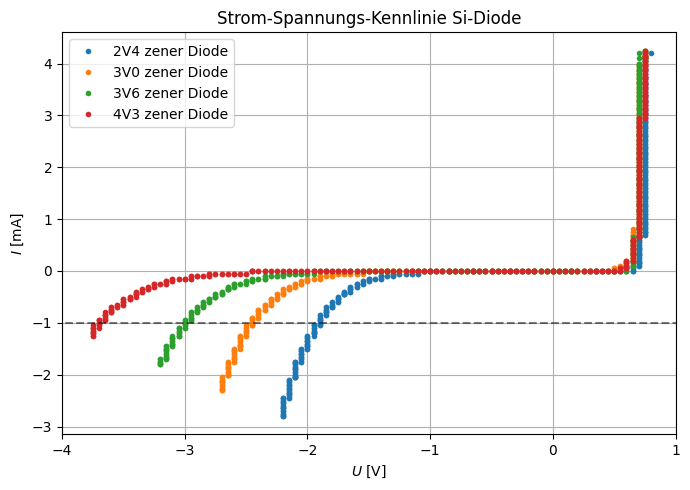

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
#Zener Dioden

# Daten laden
Kennlinie_zener_Diode = pd.read_csv("Kennlinie_Zener_Diode.csv", sep=',', decimal='.')
U_1 = Kennlinie_zener_Diode['U_1'].values
I_1 = Kennlinie_zener_Diode['I_1'].values       #mA

U_2 = Kennlinie_zener_Diode['U_2'].values
I_2 = Kennlinie_zener_Diode['I_2'].values       #mA

U_3 = Kennlinie_zener_Diode['U_3'].values
I_3 = Kennlinie_zener_Diode['I_3'].values       #mA

U_4 = Kennlinie_zener_Diode['U_4'].values
I_4 = Kennlinie_zener_Diode['I_4'].values       #mA


U_Z1 = np.interp(-1.0, I_1, U_1)
U_Z2 = np.interp(-1.0, I_2, U_2)
U_Z3 = np.interp(-1.0, I_3, U_3)
U_Z4 = np.interp(-1.0, I_4, U_4)

plt.figure(figsize=(7, 5))
plt.hlines(y=-1, xmin=-5, xmax=2, colors='black', linestyles='dashed', alpha=0.5,zorder=11)
plt.plot(U_1,I_1, 'o', markersize=3,zorder=10, label="2V4 zener Diode")
plt.plot(U_2,I_2, 'o', markersize=3,zorder=10, label="3V0 zener Diode")
plt.plot(U_3,I_3, 'o', markersize=3,zorder=10, label="3V6 zener Diode")
plt.plot(U_4,I_4, 'o', markersize=3,zorder=10, label="4V3 zener Diode")
plt.xlabel("$U$ [V]")
plt.ylabel("$I$ [mA]")
plt.title("Strom-Spannungs-Kennlinie Si-Diode")
plt.legend()
plt.xlim(right=1, left=-4)
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Kennlinie_zener_diode.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Kennlinie_zener_diode.pdf")
plt.show()

display(Math("2V4:"rf"U_{{Z1}} = {U_Z1:.2f}\pm 0.1~\mathrm{{V}}"))
display(Math("3V0:"rf"U_{{Z2}} = {U_Z2:.2f}\pm 0.1~\mathrm{{V}}"))
display(Math("3V6:"rf"U_{{Z3}} = {U_Z3:.2f}\pm 0.1~\mathrm{{V}}"))
display(Math("4V3:"rf"U_{{Z4}} = {U_Z4:.2f}\pm 0.1~\mathrm{{V}}"))


#UNSICHERHEIT messwerte haben sichtlich eine unsicherheit von 0.05V, vielleicht aufgrund alter und vorwiderstand unsicherheit noch bissl erhöhen.
#Finde noch literaturvergleich für BZX55C serie dioden

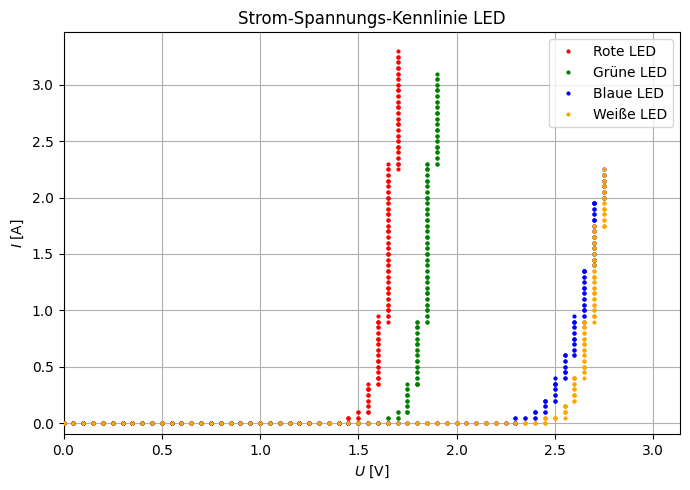

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

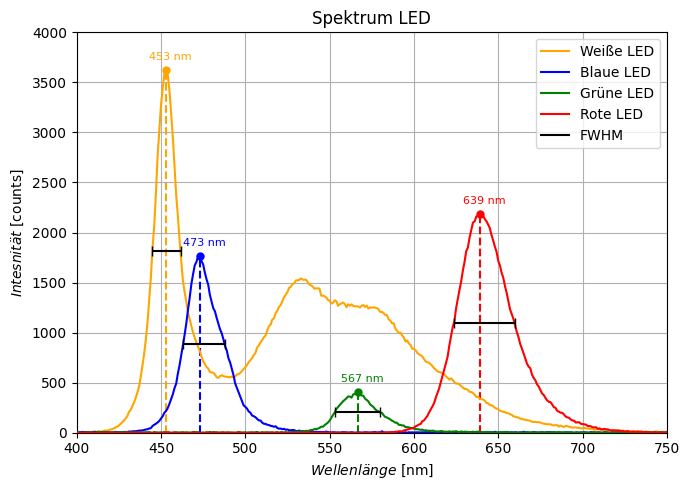

In [5]:
#LED

# Daten laden
Kennlinie_LED = pd.read_csv("Kennlinie_LED.csv", sep=',', decimal='.')
U_1 = Kennlinie_LED['U_1'].values
I_1 = Kennlinie_LED['I_1'].values

U_2 = Kennlinie_LED['U_2'].values
I_2 = Kennlinie_LED['I_2'].values

U_3 = Kennlinie_LED['U_3'].values
I_3 = Kennlinie_LED['I_3'].values

U_4 = Kennlinie_LED['U_4'].values
I_4 = Kennlinie_LED['I_4'].values

# Wellenspektren daten

Spektrum_LED = pd.read_csv("output.csv", sep=',', decimal='.')


wellenlänge_wert = Spektrum_LED['Wavelength'].values
wellenlänge = wellenlänge_wert
Int_1 = Spektrum_LED['Int_1'].values
Int_2 = Spektrum_LED['Int_2'].values
Int_3 = Spektrum_LED['Int_3'].values
Int_4 = Spektrum_LED['Int_4'].values

plt.figure(figsize=(7, 5))

plt.plot(U_4,I_4, 'o', markersize=2,zorder=10,label="Rote LED", color='Red')
plt.plot(U_3,I_3, 'o', markersize=2,zorder=10,label="Grüne LED", color='Green')
plt.plot(U_1,I_1, 'o', markersize=2,zorder=10,label="Blaue LED", color='Blue')
plt.plot(U_2,I_2, 'o', markersize=2,zorder=10,label="Weiße LED", color='Orange')

plt.xlabel("$U$ [V]")
plt.ylabel("$I$ [A]")
plt.title("Strom-Spannungs-Kennlinie LED")
plt.ylim(bottom=-0.1)
plt.xlim(left=0)
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Kennlinie_LED.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Kennlinie_LED.pdf")
plt.show()


#Wellenlängen - Man braucht höhere operating voltages desto kleiner die wellenlänge wird (Energie steigt).

plt.figure(figsize=(7, 5))


# Maxima finden und vertikale Linien einzeichnen
farben = ['orange', 'blue', 'green', 'red']
intensitäten = [ Int_4, Int_1, Int_2, Int_3]
labels = ['Weiße LED', 'Blaue LED', 'Grüne LED', 'Rote LED']

# Plot Kurven
for intensität, farbe, label in zip(intensitäten, farben, labels):
    plt.plot(wellenlänge, intensität, '-', markersize=3, zorder=10, label=label, color=farbe)

    # Maxima
    max_idx = np.argmax(intensität)
    λ_max = wellenlänge[max_idx]
    I_max = intensität[max_idx]

    # Vertikale gestrichelte Linie bei Maximum
    plt.vlines(x=λ_max, ymin=0, ymax=I_max, linestyles='dashed', colors=farbe)
    plt.plot(λ_max, I_max, 'o', color=farbe, markersize=5)
    plt.text(λ_max-10, I_max+100, f'{int(λ_max)} nm', color=farbe, fontsize=8)
    
    # Halbwertshöhe
    halbwert = I_max / 2


    # Interpolation links des Maximums
    links = np.where(wellenlänge < λ_max)[0]
    for i in reversed(links):
        if intensität[i] <= halbwert:
            λ_links = np.interp(halbwert, [intensität[i], intensität[i+1]], [wellenlänge[i], wellenlänge[i+1]])
            break

    # Interpolation rechts des Maximums
    rechts = np.where(wellenlänge > λ_max)[0]
    for i in rechts:
        if intensität[i] <= halbwert:
            λ_rechts = np.interp(halbwert, [intensität[i-1], intensität[i]], [wellenlänge[i-1], wellenlänge[i]])
            break
    
    # FWHM berechnen
    fwhm = λ_rechts - λ_links
    unsicherheit = fwhm / 2

    # FWHM Bereich markieren
    plt.hlines(y=halbwert, xmin=λ_links, xmax=λ_rechts, colors='black', linestyles='solid',zorder=11)

    # Vertikale Ticks links und rechts
    tick_height = 50
    plt.vlines(x=λ_links, ymin=halbwert - tick_height, ymax=halbwert + tick_height, color='black', linewidth=1,zorder=11)
    plt.vlines(x=λ_rechts, ymin=halbwert - tick_height, ymax=halbwert + tick_height, color='black', linewidth=1,zorder=11)

    
    # Ausgabe: λ ± Δλ als Math-Formel
    display(Math(rf"\lambda_{{\mathrm{{{label}}}}} = {λ_max:.2f} \pm {unsicherheit:.2f}\ \mathrm{{nm}}"))
    display(Math(rf"F = {fwhm:.2f} \mathrm{{nm}}"))
plt.plot([0,0],[0,0], '-', color="black", label="FWHM")
plt.xlabel("$Wellenlänge$ [nm]")
plt.ylabel("$Intesnität$ [counts]")
plt.title("Spektrum LED")
plt.ylim(bottom=0, top=4000)
plt.xlim(left=400, right=750)
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/LED_spektrum.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/LED_spektrum.pdf")
plt.show()



Die Diode als Gleichrichter

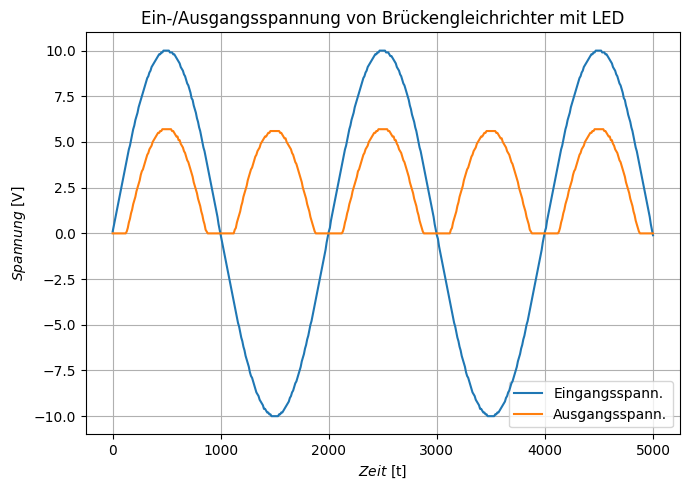

In [6]:
# Brückengleichrichter LED

Brückengl_LED = pd.read_csv("Brueckengl_LED.csv", sep=',', decimal='.')
U_ein = Brückengl_LED['U_ein'].values
U_aus = Brückengl_LED['U_aus'].values
t = Brückengl_LED['t'].values

plt.figure(figsize=(7, 5))
plt.plot(t,U_ein, '-', markersize=3,zorder=10, label="Eingangsspann.")
plt.plot(t,U_aus, '-', markersize=3,zorder=10, label="Ausgangsspann.")
plt.xlabel("$Zeit$ [t]")
plt.ylabel("$Spannung$ [V]")
plt.title("Ein-/Ausgangsspannung von Brückengleichrichter mit LED")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Brückengleichrichter_LED.pdf")#
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Brückengleichrichter_LED.pdf")
plt.show()

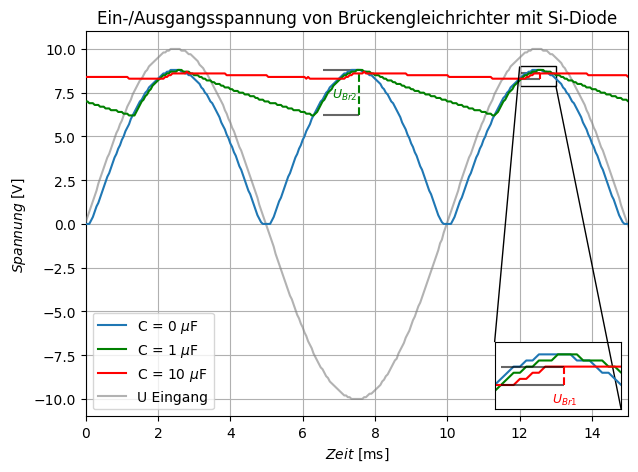

,C = 1 µF,C = 10 µF
0,8.80 - 6.20 = 2.60,8.70 - 8.30 = 0.40
1,8.80 - 6.20 = 2.60,8.60 - 8.30 = 0.30
2,8.80 - 6.20 = 2.60,8.60 - 8.30 = 0.30
3,8.80 - 6.20 = 2.60,8.60 - 8.30 = 0.30
4,8.70 - 6.30 = 2.40,8.60 - 8.30 = 0.30


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Brückengleichrichter Si-Diode

#fixer lastwiderstand = 10 k ohm

Trans_Kennlinie = pd.read_csv("Brueckengl_Si.csv", sep=',', decimal='.')
U_ein = Trans_Kennlinie['U_ein'].values             #eingangsspannung  
U_ohne = Trans_Kennlinie['channelB1'].values        #ohne kondensator
U_c1 = Trans_Kennlinie['channelB2'].values          #1 mikro-farad Kondenstator 
U_c2 = Trans_Kennlinie['channelB3'].values          #10 mikro-farad Kondenstator

t = Trans_Kennlinie['t'].values                #in ms

def Plotte_brummspannung(U, index, farbe, links, rechts):
    U_max = np.max(U[::6])
    U_min = np.min(U[::6])
    U_br = U_max - U_min

    # Horizontal gestrichelte Linien für Max und Min
    plt.hlines(y=U_max, xmin=t[links], xmax=t[rechts], colors="black",alpha=0.6, linestyles='solid')
    plt.hlines(y=U_min, xmin=t[links], xmax=t[rechts], colors="black",alpha=0.6, linestyles='solid')

    plt.vlines(x=t[rechts], ymin=U_min, ymax=U_max, color=farbe, linestyle='dashed')
    
    return U_br

fig, ax = plt.subplots(figsize=(7, 5))

U_br1 = Plotte_brummspannung(U_c1, 1, "green", -370, -350)
U_br2 = Plotte_brummspannung(U_c2, 2, "red", -260, -250)

ax.plot(t, U_ohne, '-', markersize=3, zorder=10, label=r"C = 0 $\mu$F")
ax.plot(t, U_c1, 'g-', markersize=3, zorder=10, label=r"C = 1 $\mu$F")
ax.plot(t, U_c2, 'r-', markersize=3, zorder=10, label=r"C = 10 $\mu$F")
ax.plot(t, U_ein, '-', markersize=3, zorder=5, label=r"U Eingang", color='gray', alpha=0.6)
# Brumsspannung text
ax.text(6.8, 7.2, rf"$U_{{{{Br}}{2}}}$", color="green", fontsize=9)

ax.set_xlabel("$Zeit$ [ms]")
ax.set_ylabel("$Spannung$ [V]")
ax.set_title("Ein-/Ausgangsspannung von Brückengleichrichter mit Si-Diode")
ax.legend()
ax.grid()
ax.set_xlim(0, 15)


# Zoom erstellen

axins = zoomed_inset_axes(ax, zoom=3.5, loc='lower right')  # größe/position vom zoom bild
axins.plot(t, U_ohne, '-', markersize=3)
axins.plot(t, U_c1, 'g-', markersize=3)
axins.plot(t, U_c2, 'r-', markersize=3)
#axins.plot(t, U_ein, '-', markersize=3, color='gray', alpha=0.6)

U_br2 = Plotte_brummspannung(U_c2, 2, "red", -260, -250)

# Zoom-Bereich
axins.text(12.45, 8, rf"$U_{{{{Br}}{1}}}$", color=farbe, fontsize=9)
axins.set_xlim(12, 13)
axins.set_ylim(7.9, 9)
axins.grid(True)

axins.set_xticks([])
axins.set_yticks([])

# Markiere Bereich auf Hauptplot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")
# # Ausgabe Brummspannung
# display(Math(rf"U_{{\mathrm{{Br}}{index}}} = {U_max:.2f} - {U_min:.2f} = {U_br:.2f}\ \mathrm{{V}}"))

#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Brückengleichrichter_Si.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Brückengleichrichter_Si.pdf")
plt.show()


# def Berechne_brummspannung(U, index, Min, Max):
#     U_max = np.max(U[Min::Max])
#     U_min = np.min(U[Min::Max])
#     U_br = U_max - U_min
#     display(Math(rf"U_{{\mathrm{{Br}}{index}}} = {U_max:.2f} - {U_min:.2f} = {U_br:.2f}\ \mathrm{{V}}"))
#     return U_br


# U_br1= Berechne_brummspannung(U_c1, 1, [2,6,12],[4,8,14])

def Berechne_brummspannung(U, index, Min_list, Max_list):
    results = []
    for i, (Min, Max) in enumerate(zip(Min_list, Max_list), start=1):
        U_max = np.max(U[Min::Max])
        U_min = np.min(U[Min::Max])
        U_br = U_max - U_min
        result_str = f"{U_max:.2f} - {U_min:.2f} = {U_br:.2f}"
        results.append(result_str)
    return results

def Berechne_brummspannung_numeric(U, Min_list, Max_list):
    br_values = []
    for Min, Max in zip(Min_list, Max_list):
        U_max = np.max(U[Min::Max])
        U_min = np.min(U[Min::Max])
        U_br = U_max - U_min
        br_values.append(U_br)
    return br_values


U_br1= Berechne_brummspannung(U_c1, 1, [2,6,12,17,22],[4,8,14,19,24])
U_br2= Berechne_brummspannung(U_c2, 2, [2,6,12,17,22],[4,8,14,19,24])

# Assemble into DataFrame
df = pd.DataFrame({
    "C = 1 µF": U_br1,
    "C = 10 µF": U_br2
})

display(df)


# Get numeric values
U_br1_vals = Berechne_brummspannung_numeric(U_c1, [2,6,12,17,22],[4,8,14,19,24])
U_br2_vals = Berechne_brummspannung_numeric(U_c2, [2,6,12,17,22],[4,8,14,19,24])

# Calculate mean
mean_br1 = np.mean(U_br1_vals)
mean_br2 = np.mean(U_br2_vals)

# Standard error of the mean
stderr_br1 = np.std(U_br1_vals, ddof=1) / np.sqrt(len(U_br1_vals))
stderr_br2 = np.std(U_br2_vals, ddof=1) / np.sqrt(len(U_br2_vals))

display(Math(rf"\overline{{U_{{\mathrm{{Br1}}}}}} = {mean_br1:.3f} \pm {stderr_br1:.3f}\ \mathrm{{V}}"))
display(Math(rf"\overline{{U_{{\mathrm{{Br2}}}}}} = {mean_br2:.3f} \pm {stderr_br2:.3f}\ \mathrm{{V}}"))


Der Bipolaresistor

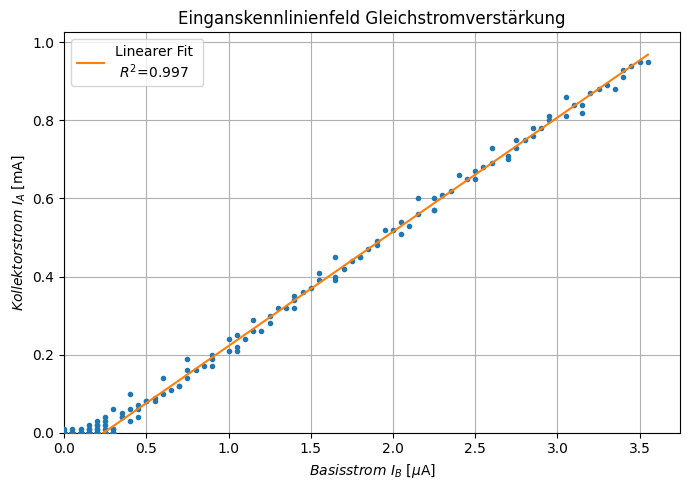

<IPython.core.display.Math object>

In [8]:
#Stromstreukennlinie Gleichstromverstärker

Trans_Kennlinie = pd.read_csv("Eingangskennlinie_Verstärker.csv", sep=',', decimal='.')
U_wert = Trans_Kennlinie['channelA1'].values[:-120]         #eingangsspannung in Volt 
I_B  = U_wert/100                                           #spannung V durch widerstand  k_ohm = mA
I_C = Trans_Kennlinie['channelB1'].values[:-120]            #ohne kondensator

mask = I_B >= 0.0003                                         #fit ab I_B in milli ampere
I_B_fit = I_B[mask]
I_C_fit = I_C[mask]

k,y,r,_,k_std=linregress(I_B_fit, I_C_fit)

plt.figure(figsize=(7, 5))

plt.plot(I_B*1e3,I_C, 'o', markersize=3,zorder=10)
plt.plot(I_B*1e3,k*I_B+y, '-', markersize=3,zorder=10,label=f"Linearer Fit \n $R^2$={r**2:.3f}")

plt.xlabel(r"$Basisstrom ~I_B$ [$\mu$A]")
plt.ylabel("$Kollektorstrom ~I_A$ [mA]")
plt.title("Einganskennlinienfeld Gleichstromverstärkung")
plt.legend()
plt.grid()
plt.ylim(bottom=0)
plt.xlim(left=-0.0005)
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Gleichstromverstärker.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Gleichstromverstärker.pdf")
plt.show()
display(Math(rf"B = {k:.3f} \pm {k*0.1:.3f}"))


#zum zitieren von B: https://www.alldatasheet.com/datasheet-pdf/download/1439710/ONSEMI/BC548B.html


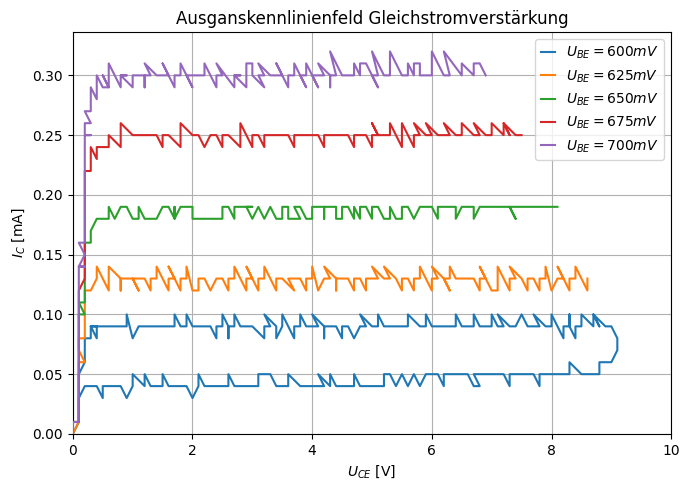

In [ ]:
#???

Aus_Kennlinie_verstärker = pd.read_csv("Ausgangskennlinie_Verstärker.csv", sep=',', decimal='.')
U_1 = Aus_Kennlinie_verstärker['channelA1'][:-120]
I_1 = Aus_Kennlinie_verstärker['channelB1'][:-120]          #Channel B immer in mA

U_2 = Aus_Kennlinie_verstärker['channelA2'].values[:-120]
I_2 = Aus_Kennlinie_verstärker['channelB2'].values[:-120]           #mA

U_3 = Aus_Kennlinie_verstärker['channelA3'].values[:-120]
I_3 = Aus_Kennlinie_verstärker['channelB3'].values[:-120]           #mA

U_4 = Aus_Kennlinie_verstärker['channelA4'].values[:-120]
I_4 = Aus_Kennlinie_verstärker['channelB4'].values[:-120]           #mA

U_5 = Aus_Kennlinie_verstärker['channelA5'].values[:-120]
I_5 = Aus_Kennlinie_verstärker['channelB5'].values[:-120]           #mA 

plt.figure(figsize=(7, 5))
plt.plot(U_1,I_1, '-', markersize=3,zorder=10, label="$U_{{BE}}=600mV$")
plt.plot(U_2,I_2, '-', markersize=3,zorder=10, label="$U_{{BE}}=625mV$")
plt.plot(U_3,I_3, '-', markersize=3,zorder=10, label="$U_{{BE}}=650mV$")
plt.plot(U_4,I_4, '-', markersize=3,zorder=10, label="$U_{{BE}}=675mV$")
plt.plot(U_5,I_5, '-', markersize=3,zorder=10, label="$U_{{BE}}=700mV$")
plt.xlabel("$U_{{CE}}$ [V]")
plt.ylabel("$I_{{C}}$ [mA]")
plt.title("Ausganskennlinienfeld Gleichstromverstärkung")
plt.legend(handlelength=1)
plt.grid()
plt.ylim(bottom=0)
plt.xlim(left=0,right=10)
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Ausganskennlinie_Verstärker.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Ausganskennlinie_Verstärker.pdf")
plt.show()

#U_BE:
#600 - 625 - 650 - 675 - 700

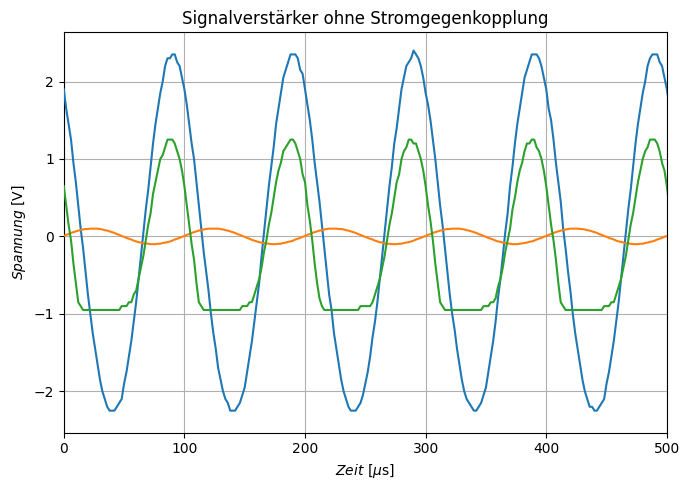

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

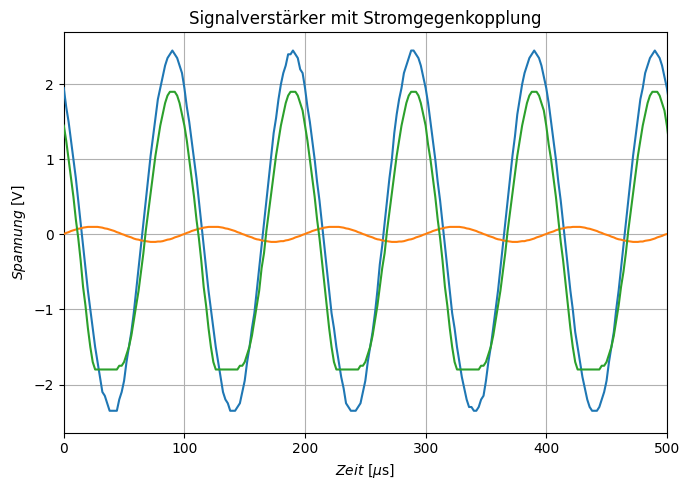

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
#Transistor als Signalversärker

Signalverstärkung_1 = pd.read_csv("Kleinsignalverstärkung_ohne_StrGK.csv", sep=',', decimal='.')

t = Signalverstärkung_1['time'].values

U_1 = Signalverstärkung_1['U1'].values
I_1 = Signalverstärkung_1['I1'].values          #Channel B immer in mA

U_2 = Signalverstärkung_1['U2'].values
I_2 = Signalverstärkung_1['I2'].values         #mA

plt.figure(figsize=(7, 5))
plt.plot(t,I_1, '-', markersize=3,zorder=10)
plt.plot(t,U_1, '-', markersize=3,zorder=10)
plt.plot(t,I_2, '-', markersize=3,zorder=10)
plt.xlabel(r"$Zeit$ [$\mu$s]")
plt.ylabel("$Spannung$ [V]")
plt.title("Signalverstärker ohne Stromgegenkopplung")
#plt.legend()
plt.grid()
plt.xlim(left=0, right=500)
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Signalverstärker_ohne_Stromgegenkopplung.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Signalverstärker_ohne_Stromgegenkopplung.pdf")
plt.show()

U_ein = ufloat(np.max(U_1), 0.005)
U_aus = ufloat(np.max(I_1), 0.005)
U_aus_erhitzt = ufloat(np.max(I_2), 0.005)
v = U_aus/U_ein
v_erhitzt = U_aus_erhitzt/U_ein

display(Math(rf"U_{{C,vor}} = 2.6 \pm 0.5"))
display(Math(rf"U_{{C,nach}} = 0.7 \pm 0.5"))
display(Math(rf"U_{{ein}} = {U_ein:.3f}"))
display(Math(rf"U_{{aus}} = {U_aus:.3f}"))
display(Math(rf"U'_{{aus}} = {U_aus_erhitzt:.3f}"))
display(Math(rf"V = {v:.3f}"))
display(Math(rf"V' = {v_erhitzt:.3f}"))


Signalverstärkung_2 = pd.read_csv("Kleinsignalverstärkung_mit_StrGK.csv", sep=',', decimal='.')

t = Signalverstärkung_2['time'].values

U1 = Signalverstärkung_2['U_1'].values
I1 = Signalverstärkung_2['I_1'].values          #Channel B immer in mA

U2 = Signalverstärkung_2['U_2'].values
I2 = Signalverstärkung_2['I_2'].values         #mA

plt.figure(figsize=(7, 5))
plt.plot(t,I1, '-', markersize=3,zorder=10)
plt.plot(t,U1, '-', markersize=3,zorder=10)
plt.plot(t,I2, '-', markersize=3,zorder=10)
plt.xlabel(r"$Zeit$ [$\mu$s]")
plt.ylabel("$Spannung$ [V]")
plt.title("Signalverstärker mit Stromgegenkopplung")
#plt.legend()
plt.grid()
plt.xlim(left=0, right=500)
plt.tight_layout()
#plt.savefig("/mnt/c/Physik/Laborprakitkum2/PS10/Signalverstärker_mit_Stromgegenkopplung.pdf")
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Signalverstärker_mit_Stromgegenkopplung.pdf")
plt.show()

Uein = ufloat(np.max(U1), 0.005)
Uaus = ufloat(np.max(I1), 0.005)
Uaus_erhitzt = ufloat(np.max(I2), 0.005)
V = Uaus/Uein
V_erhitzt = Uaus_erhitzt/Uein

display(Math(rf"U_{{C,vor}} = 2.6 \pm 0.5"))
display(Math(rf"U_{{C,nach}} = 0.7 \pm 0.5"))
display(Math(rf"U_{{ein}} = {Uein:.3f}"))
display(Math(rf"U_{{aus}} = {Uaus:.3f}"))
display(Math(rf"U'_{{aus}} = {Uaus_erhitzt:.3f}"))
display(Math(rf"V = {V:.3f}"))
display(Math(rf"V' = {V_erhitzt:.3f}"))